In [1]:
import pandas as pd
path = './output'
df = pd.read_csv(path+'/train_predicted_value_full_three_models.csv')
df.head()

,pid,t,month,true,mod1_XGB,mod2_LGB,mod3_DNN,mod4_Ensemble
0,348,0.0,0,39.0,39.910500,39.474064,39.292816,39.586870
1,348,4.0,0,38.0,39.910500,39.474064,39.213329,39.578921
2,348,52.0,1,38.0,38.625534,38.354161,37.774158,38.377573
3,348,61.0,2,38.0,38.347618,38.191011,37.121517,38.131044
4,348,99.0,3,38.0,37.286861,36.698069,35.915813,36.796481


In [2]:
import package_gu.pm as pm
help(pm)

Help on module package_gu.pm in package_gu:

NAME
    package_gu.pm - Created on Sun Apr  7 15:42:50 2019

DESCRIPTION
    This is a package for evaluating different models and compare the performances for Python.
    
    PACKAGE CONTENTS:
        function1: descriptive statistics
        function2: histogram of a column
        function3: boxplot of predicted value for every model
        function4: plot predicted VS observed; plot residual VS observed
        function5: MPE for filtered feature
        function6 and 7: compare the perform of models with filtered feature
        function 8: get the confidence interval 
    @author: eileen

FUNCTIONS
    MPE_histogram(df, category, lower, upper, model)
        # function 5
    
    binned_prediction_summary(data)
        # function 1
    
    confidence_interval(df, category, lower, upper, model, confidence=0.95)
    
    draw_box(df, category, lower, upper)
        # function 3
    
    draw_scatter(df, filter_feature=None, lb=0, ub=

In [3]:
# function1: descriptive statistics
# input: the dataset
pm.binned_prediction_summary(df)

,t,month,true,mod1_XGB,mod2_LGB,mod3_DNN,mod4_Ensemble
count,30236.000,30236.000,30236.000,30236.000,30236.000,30236.000,30236.000
mean,199.094,6.229,32.791,32.734,32.749,32.277,32.697
std,197.329,6.511,8.974,7.615,7.526,7.415,7.476
min,-346.000,-11.000,0.000,2.775,6.434,12.168,6.655
25%,52.000,1.000,28.000,27.695,27.641,27.096,27.616
50%,157.000,5.000,35.000,33.791,33.774,32.164,33.629
75%,295.000,9.000,39.000,38.538,38.626,37.217,38.439
max,2114.000,70.000,48.000,49.201,47.809,189.804,53.870


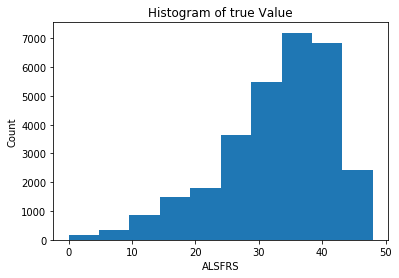

In [4]:
# function2: histogram of a column. 
# input: a column name of data
pm.histogram(df, 'true')

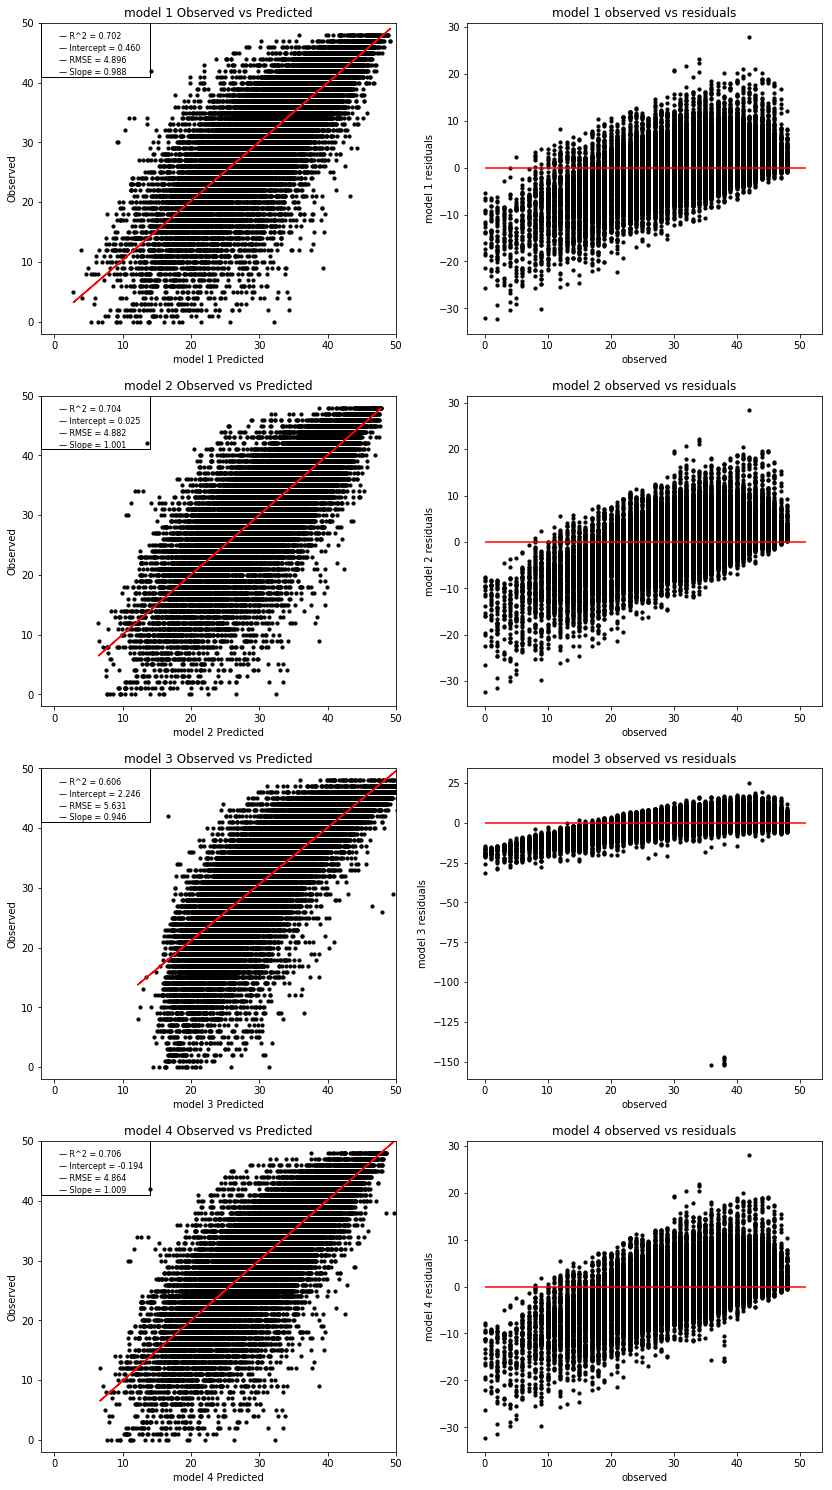

In [5]:
# function4 plot predicted VS observed; plot residual VS observed
# input: 
# (dataset, filter_feature, lowerboundary, upperboundary)# input: dataset
pm.draw_scatter(df)

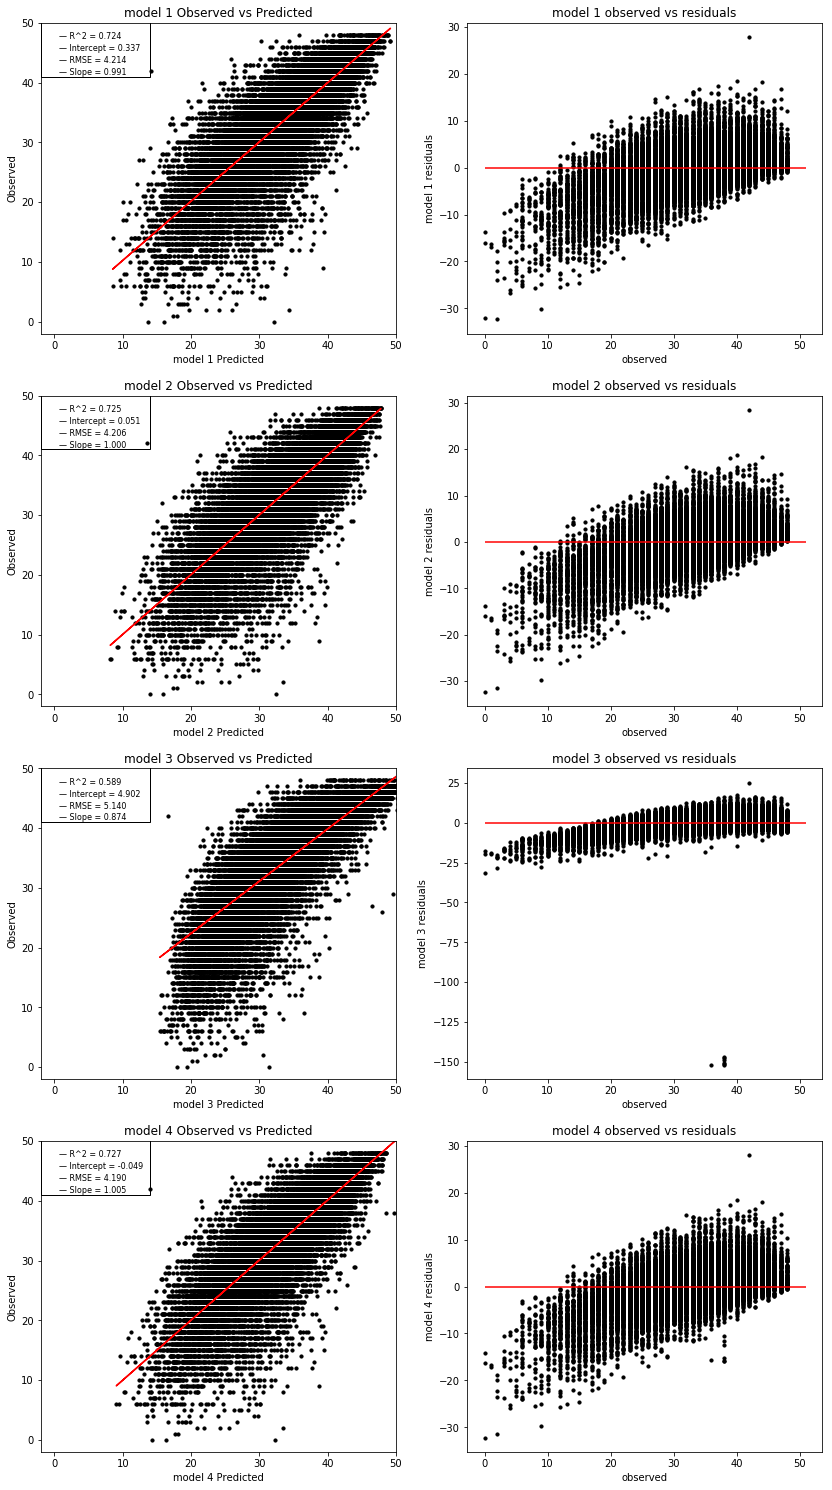

In [6]:
# function4 plot predicted VS observed; plot residual VS observed
# input: 
# (dataset, filter_feature, lowerboundary, upperboundary)# input: dataset
pm.draw_scatter(df, 't', 0, 366)

In [7]:
# function6 and 7
# compare the perform of models with filtered feature
# input: 
# (dataset, filter_feature, lowerboundary, upperboundary)
q1 = pm.prediction_summary(df)
q1

,mod1_XGB,mod2_LGB,mod3_DNN,mod4_Ensemble
R^2,0.702,0.704,0.606,0.706
RMSE,4.896,4.882,5.631,4.864
Slope,0.988,1.001,0.946,1.009
Intercept,0.460,0.025,2.246,-0.194
Skewness,-0.537,-0.522,2.194,-0.468


In [8]:
q2 = pm.prediction_summary(df, 't', 0, 456)
q2

,mod1_XGB,mod2_LGB,mod3_DNN,mod4_Ensemble
R^2,0.710,0.711,0.594,0.713
RMSE,4.512,4.504,5.341,4.486
Slope,0.991,1.000,0.905,1.007
Intercept,0.324,0.024,3.758,-0.144
Skewness,-0.528,-0.534,2.526,-0.471


In [9]:
q3 = pm.prediction_summary(df, 'month', 0,10)
q3

,mod1_XGB,mod2_LGB,mod3_DNN,mod4_Ensemble
R^2,0.734,0.735,0.584,0.737
RMSE,4.024,4.015,5.027,4.001
Slope,0.991,1.001,0.854,1.004
Intercept,0.339,0.004,5.638,-0.030
Skewness,-0.542,-0.564,2.946,-0.493


D:\bigdata\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


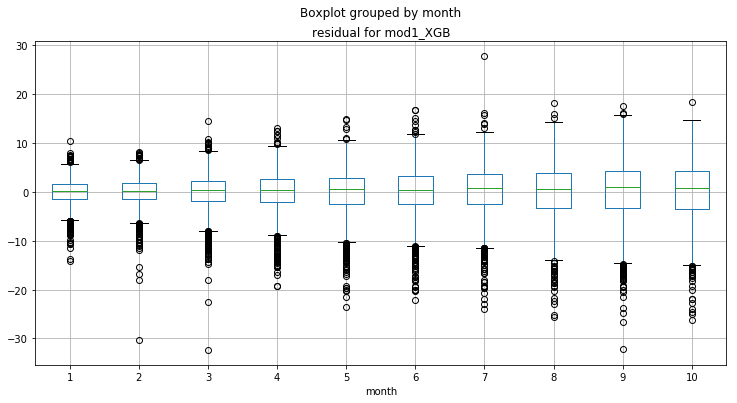

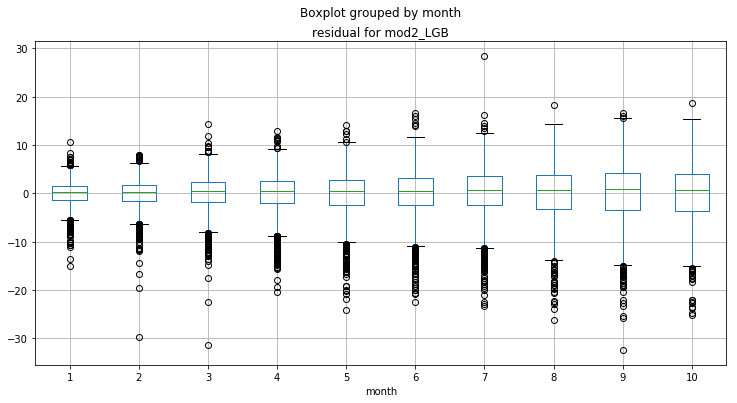

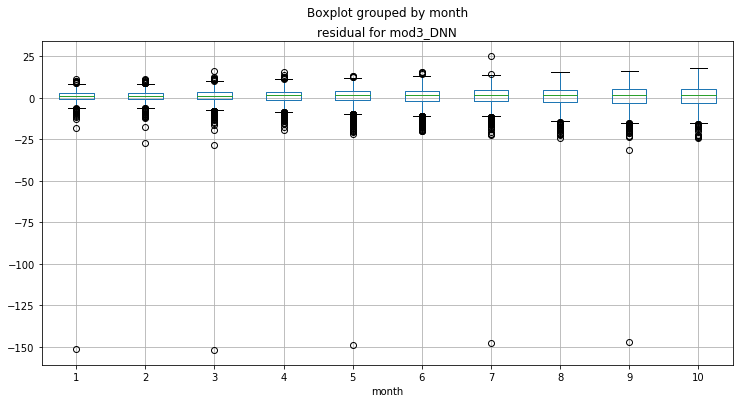

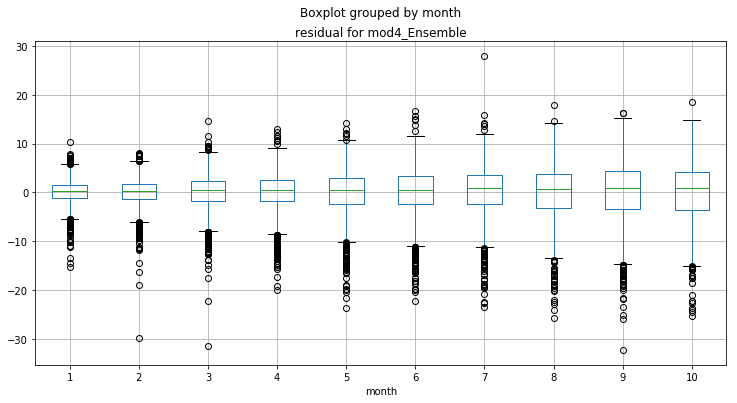

In [10]:
# function3: boxplot of predicted value for every model
# input: (dataset, filtered feature, lower, upper)
pm.draw_box(df, 'month', 1, 10)

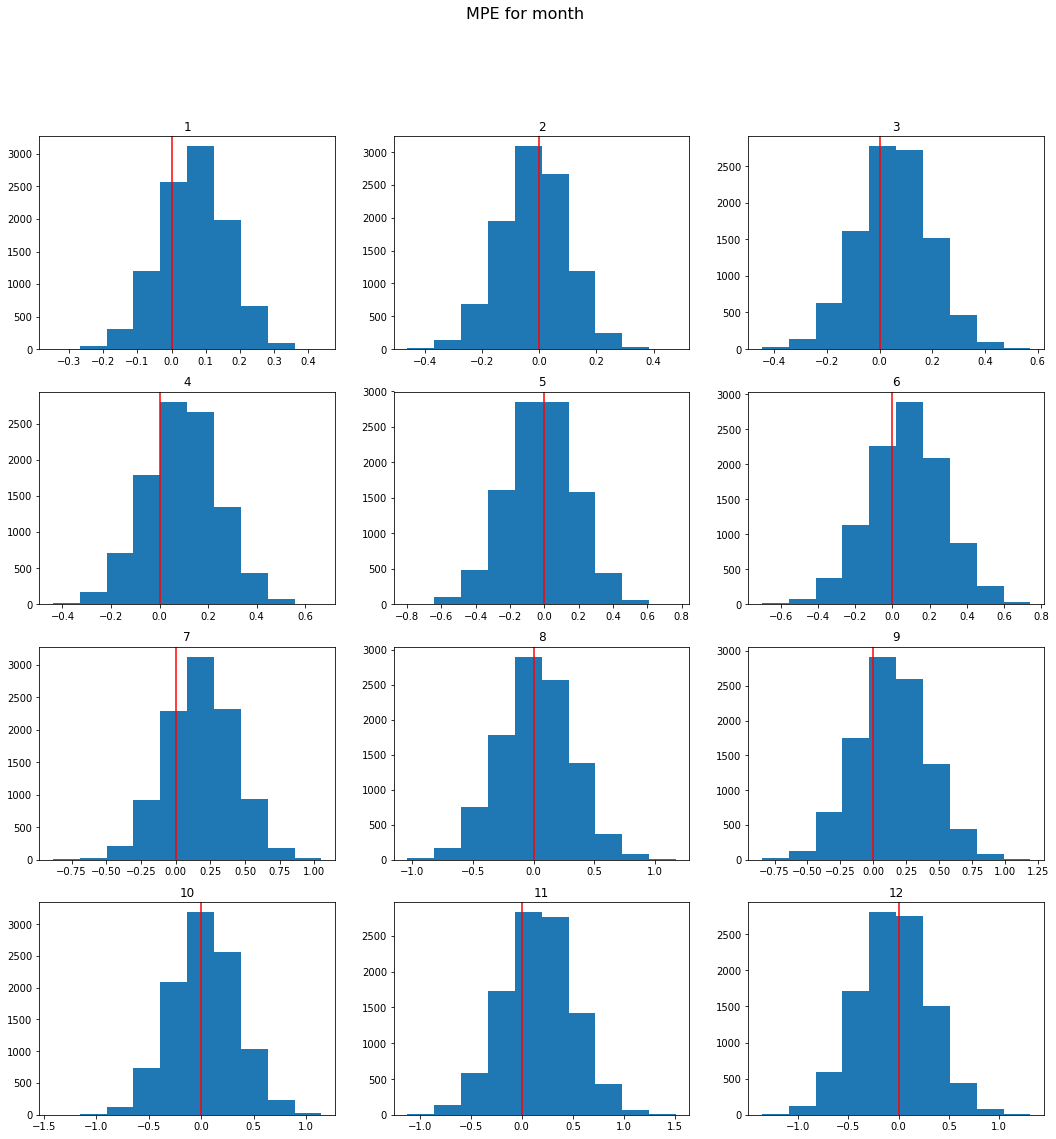

In [11]:
# function5 MPE for filtered feature.
# input: (dataset, filtered feature, lowerboundary, upperboundary, model_name in dataset)
pm.MPE_histogram(df, 'month', 1, 12, 'mod4_Ensemble')